In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y=data["label"]

In [5]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [6]:
del data["label"]

In [7]:
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
sample_x=data.head(10000)
sample_y=y.head(10000)

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [13]:
data=sc.fit_transform(sample_x)

In [14]:
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [35]:
pca_data=pca.fit_transform(data)

In [42]:
pca_data=pd.DataFrame(data=pca_data,columns=("1st_principal", "2nd_principal"))

In [43]:
pca_data = pca_data.assign(label=sample_y.values)

In [44]:
pca_data

,1st_principal,2nd_principal,label
0,-4.949692,-5.448284,1
1,18.966356,6.833772,0
2,-7.527953,-2.050996,1
3,-0.715452,5.554916,4
4,26.253683,7.291896,0
...,...,...,...
9995,-0.474807,-3.227852,5
9996,-0.089368,0.814707,0
9997,-1.546228,-5.235778,4
9998,2.425780,18.981028,7


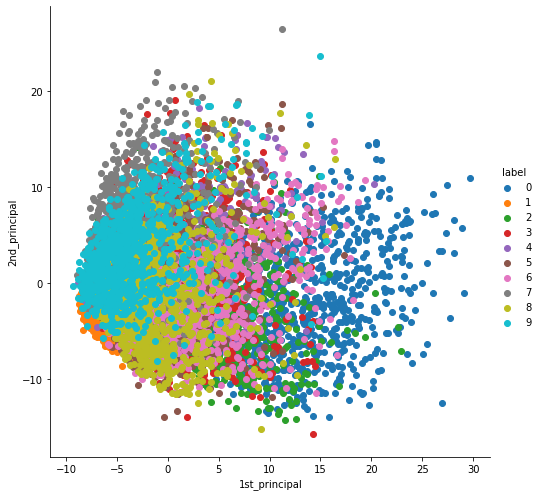

In [47]:
sns.FacetGrid(pca_data,hue="label",height=7).map(plt.scatter,"1st_principal","2nd_principal").add_legend()
plt.show()

In [53]:
pca.n_components=600
pca_data=pca.fit_transform(sample_x)
var_exp=pca.explained_variance_/np.sum(pca.explained_variance_)

cumsum=np.cumsum(var_exp)

Text(0, 0.5, 'pca.explained_variance_')

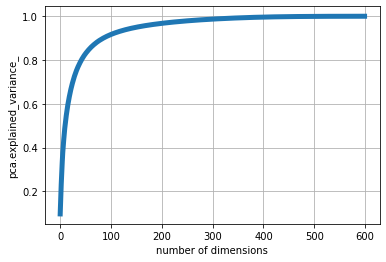

In [55]:
plt.grid()
plt.plot(cumsum,linewidth=5)
plt.xlabel("number of dimensions")
plt.ylabel("pca.explained_variance_")

In [ ]:
#we tack upto 250 dimemsions